In [1]:
import numpy as np
#we import numpy here for it's mathematical functions on arrays and multidimensional arrays
#we mostly use it here to arrange the labels on the confusion matrix.
#numpy is also used for the manipulation of array and it has functions that can contribute with mathematical equations such as linear algebra.

import cv2

import matplotlib.pyplot as plt
#matplotlib is mostly used for the creation and visualization of graphs.
#matplotlib is the standard for most graphing and plotting in python
#it works by creating figures and plots and graphs inside the figures which we can add data to.

import pandas as pd 
#gamitin pa ba natin toh? para maging maganda lang naman pang print toh eh

In [2]:
img = cv2.imread("6p.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

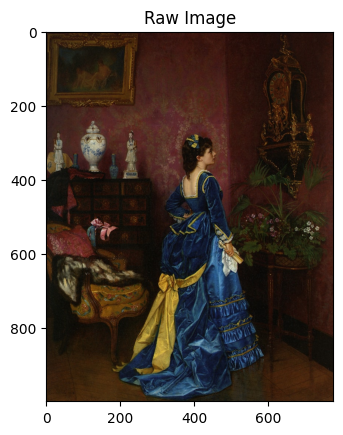

In [13]:
plt.title('Raw Image')
plt.imshow(img)

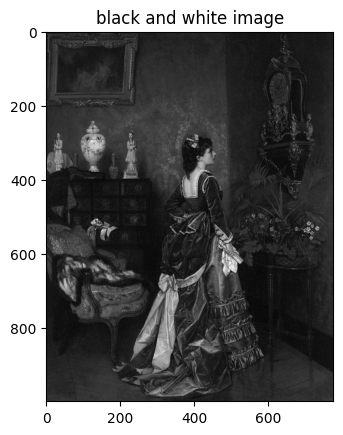

In [14]:
img_bnw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.title('Black and White Image')
plt.imshow(img_bnw, cmap="gray")

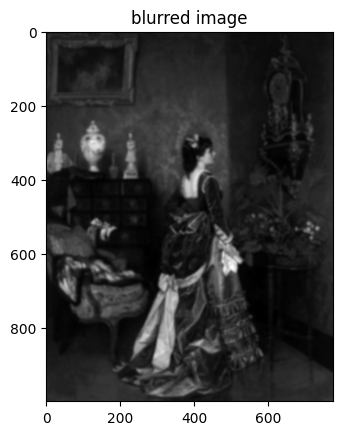

In [15]:
img_blur = cv2.GaussianBlur(img_bnw, (15, 15), 0)

plt.title('Blurred Image')
plt.imshow(img_blur, cmap = "gray")

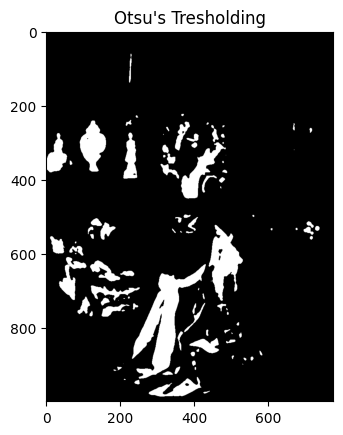

In [17]:
ret, thresh_otsu = cv2.threshold(img_blur, 100, 255, cv2.THRESH_OTSU)

plt.title('Otsu\'s Tresholding')
plt.imshow(thresh_otsu, cmap = "gray")

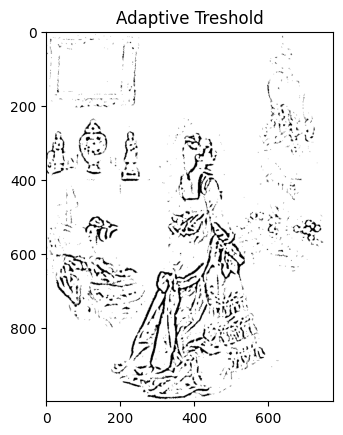

In [18]:
thresh_adaptive = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,9,2)

plt.title('Adaptive Treshold')
plt.imshow(thresh_adaptive, cmap = "gray")

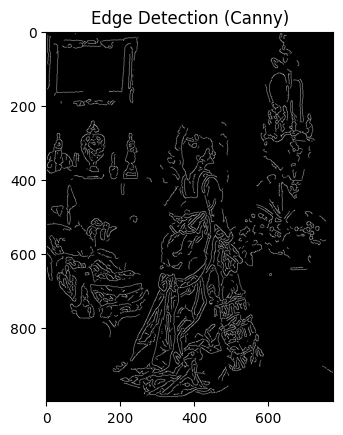

In [19]:
edges = cv2.Canny(img_blur,5, 30)

plt.title('Edge Detection (Canny)')
plt.imshow(edges, cmap = "gray")

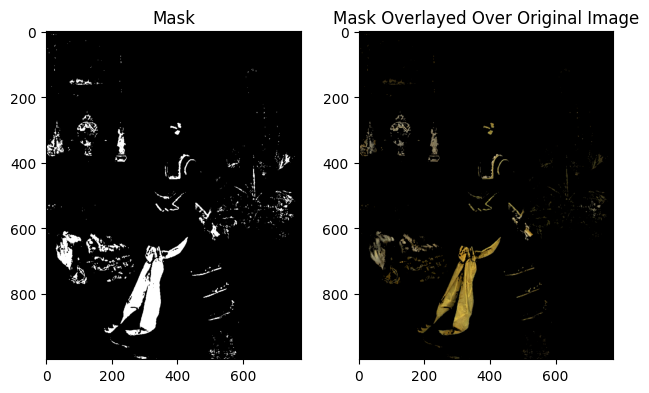

In [32]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

H_lower = 20
H_higher = 30
S_lower = 48
S_higher = 255
V_lower = 50
V_higher = 255

lower = np.array([H_lower, S_lower, V_lower])
higher = np.array([H_higher, S_higher, V_higher])

mask = cv2.inRange(img_hsv, lower, higher)

img_highlight = cv2.bitwise_and(img, img, mask = mask)

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Mask')
ax[1].set_title('Mask Overlayed Over Original Image')
plt.tight_layout()

ax[0].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img_highlight)
plt.show()

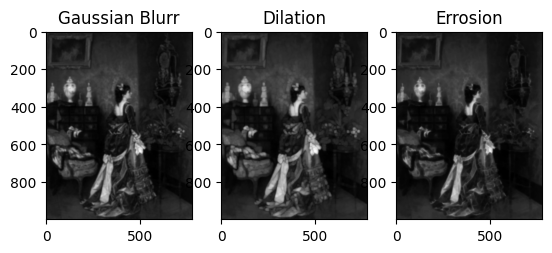

In [33]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img_blur,kernel,iterations = 1)
erosion = cv2.erode(img_blur,kernel,iterations = 1)


fig, ax = plt.subplots(1, 3)

ax[0].set_title('Gaussian Blurr')
ax[1].set_title('Dilation')
ax[2].set_title('Errosion')
    
ax[0].imshow(img_blur, cmap='gray')
ax[1].imshow(dilation, cmap = "gray")
ax[2].imshow(erosion, cmap = "gray")
plt.show()

,Coorrdinates,Size
0,"(213.1825408935547, 941.8173828125)",17.612463
1,"(197.10020446777344, 910.0142822265625)",23.844002
2,"(577.8051147460938, 869.1390991210938)",17.943756
3,"(558.0848999023438, 805.2808227539062)",17.861448
4,"(108.21297454833984, 745.0540161132812)",34.793022
5,"(356.87896728515625, 634.2481079101562)",19.751890
6,"(608.4464721679688, 535.2664794921875)",14.697263
7,"(675.5491333007812, 534.44775390625)",14.126457
8,"(343.8426818847656, 539.02978515625)",19.121748
9,"(715.381103515625, 533.2193603515625)",15.548956


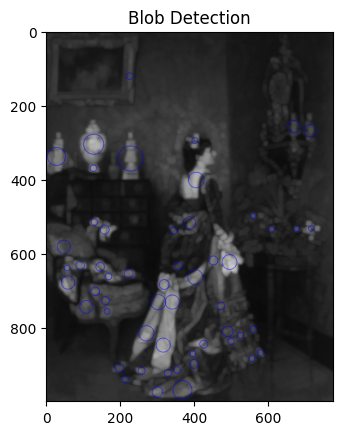

In [34]:
params = cv2.SimpleBlobDetector_Params()

image_to_blob = dilation

params.filterByArea = True
params.minArea = 100
params.filterByColor = True
params.blobColor = 255
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(image_to_blob)
img_with_keypoints = cv2.drawKeypoints(image_to_blob, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.title('Blob Detection')

plt.imshow(img_with_keypoints, cmap = "gray")
count = 0

keypoint_data = []

for keypoint in keypoints:
    data = {}
    data["Coorrdinates"] = keypoint.pt
    data["Size"] = keypoint.size
    keypoint_data.append(data)
    count += 1
keypoint_data = pd.DataFrame(keypoint_data)
keypoint_data

,Perimeter,Aspect Ratio,Extent,Solidity,Diameter,Orientation
0,451.102592,2.679245,0.409115,0.700011,62.612336,78.595322
1,235.622363,1.951220,0.505793,0.766459,45.959813,93.023659
2,394.333041,3.142857,0.311328,0.472553,46.878689,87.033157
3,1294.170695,0.641935,0.306614,0.591834,155.188034,22.571737
4,298.735061,1.421053,0.373619,0.709731,46.865107,122.482048
5,437.504615,0.637931,0.327703,0.536730,59.846661,13.299362
6,700.440687,0.448780,0.471792,0.700878,106.439116,177.414719
7,536.801076,0.796053,0.295862,0.637663,83.236608,34.356632
8,290.450791,0.537736,0.520357,0.828786,63.269781,11.008144
9,323.379723,0.304000,0.575053,0.812584,58.973331,1.518404


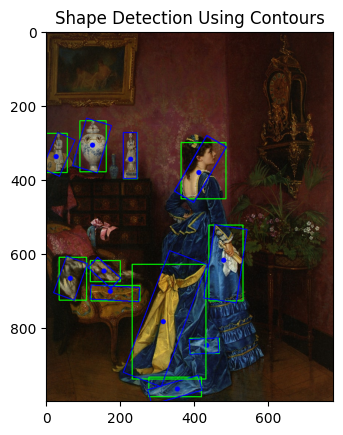

In [35]:
img_box = img.copy()

new_img = img_blur.copy()
ret, new_otsu = cv2.threshold(new_img, 100, 255, cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(new_otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

AREA_THRESH = 1500

features = []

for contour in contours:
    area = cv2.contourArea(contour)
    if area > AREA_THRESH:
        moment = cv2.moments(contour)
        center_x = int(moment['m10']/moment['m00'])
        center_y = int(moment['m01']/moment['m00'])

        cv2.circle(img_box, (center_x, center_y), 7, (0, 0, 255), -1)
        
        rect_x, rect_y, rect_w, rect_h = cv2.boundingRect(contour)
        min_rect = cv2.minAreaRect(contour)
        img_box = cv2.rectangle(img_box,
                                (rect_x, rect_y),
                                (rect_x + rect_w, rect_y + rect_h),
                                (0, 255, 0),
                                2)
        min_box = cv2.boxPoints(min_rect)
        min_box = min_box.astype(np.intp)
        cv2.drawContours(img_box, [min_box], 0, (0,0,255), 2)
        
        #perimeter, aspect ratio, extent, solidity, equivalent diameter, orientation
        feature = {}
        feature["Perimeter"] = cv2.arcLength(contour, True)
        feature["Aspect Ratio"] = rect_w/rect_h
        feature["Extent"] = float(area) / (rect_w * rect_h)
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)
        feature["Solidity"] = float(area) / hull_area if hull_area > 0 else 0
        feature["Diameter"] = np.sqrt(4 * area / np.pi).item()
        
        angle = None
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            angle = ellipse[2]
        feature["Orientation"] = angle

        features.append(feature)
features = pd.DataFrame(features)

plt.title('Shape Detection Using Contours')
plt.imshow(img_box)
features